# Mosaic image data products

Now that we have some/the images (CTX, Hirise, HRSC) reduced (as GeoTIFF) we want to create mosaics.

In [1]:
import geopandas
import pandas
pandas.set_option('display.max_columns',100)

## CTX

In [2]:
reduced_products = 'Mawrth_Vallis_reduced_sample_products_ctx.geojson'

gdf = geopandas.read_file(reduced_products)
gdf = gdf.loc[gdf.area.sort_values(ascending=False).index]

gdf

/var/folders/b1/frq3gywj3ljfqrf1yc7zk06r0000gn/T/ipykernel_31301/994023424.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf = gdf.loc[gdf.area.sort_values(ascending=False).index]


,Center_latitude,Center_longitude,Easternmost_longitude,Emission_angle,Footprints_cross_meridian,Incidence_angle,Map_scale,Maximum_latitude,Minimum_latitude,Observation_time,Phase_angle,Product_creation_time,Solar_longitude,Target_name,UTC_start_time,UTC_stop_time,Westernmost_longitude,browse_url,datasetId,id,idFromProvider,image_kbytes,image_path,inst,instrumentHostName,instrumentId,instrumentName,label_path,mission,missionPhaseName,observationMode,productCreationTime,spacecraftId,startTime,stopTime,targetName,type,tiff_path,geometry
1,24.3758,342.2817,342.87,0.09,False,59.39,5.66,27.0054,21.7462,2007-02-18T05:52:00.318000,59.41,2007-08-09T21:43:46,185.96,MARS,2007-02-18T05:51:11.313000,2007-02-18T05:52:49.324001,341.66,None,MRO_CTX,P04_002641_2046_XN_24N017W,P04_002641_2046_XN_24N017W,252001,data/ctx/P04_002641_2046_XN_24N017W.IMG,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,data/ctx/P04_002641_2046_XN_24N017W.lbl,MRO,PSP,EDR,2007-08-09T21:43:46,MRO,2007-02-18T05:51:11.313000,2007-02-18T05:52:49.324001,MARS,EDR,data/reduced/ctx/P04_002641_2046_XN_24N017W.tif,"POLYGON ((-17.80000 27.00540, -17.13000 21.805..."
0,23.2688,342.4958,342.8,5.85,False,48.88,5.66,23.6504,22.8866,2006-11-12T15:12:52.777000,43.11,2007-05-18T22:07:23,134.36,MARS,2006-11-12T15:12:46.050999,2006-11-12T15:12:59.504002,342.19,None,MRO_CTX,P01_001388_2034_XI_23N017W,P01_001388_2034_XI_23N017W,35001,data/ctx/P01_001388_2034_XI_23N017W.IMG,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,data/ctx/P01_001388_2034_XI_23N017W.lbl,MRO,PSP,EDR,2007-05-18T22:07:23,MRO,2006-11-12T15:12:46.050999,2006-11-12T15:12:59.504002,MARS,EDR,data/reduced/ctx/P01_001388_2034_XI_23N017W.tif,"POLYGON ((-17.29000 23.65040, -17.20000 22.936..."


<AxesSubplot:>

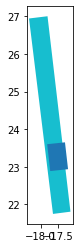

In [3]:
gdf.plot(column='id')

# What about the data?

Let's look into what those rasters and their metadata bring to us.

In [4]:
import npt
from npt.pipelines import mosaic
npt.log.set_level('DEBUG')

In [5]:
import json
gjson_ctx = json.loads(gdf.to_json())

In [6]:
mosaic(gjson_ctx, basepath='data/mosaic/ctx', method='merge')

INFO:__init__.mosaic(): 2 features read
DEBUG:__init__.mosaic(): Sources: ['data/reduced/ctx/P04_002641_2046_XN_24N017W.tif', 'data/reduced/ctx/P01_001388_2034_XI_23N017W.tif']
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P04_002641_2046_XN_24N017W.rescaled.tif
DEBUG:__init__._mosaic(): Rescaled filename to-write: data/mosaic/ctx/P01_001388_2034_XI_23N017W.rescaled.tif
DEBUG:_xarray.merge(): Running 'merge', from npt.utils._xarray
/opt/miniconda3/envs/npt/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/miniconda3/envs/npt/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


,Footprints_cross_meridian,Map_scale,Target_name,browse_url,datasetId,inst,instrumentHostName,instrumentId,instrumentName,mission,missionPhaseName,observationMode,spacecraftId,targetName,type,id_sources,geometry,tiff_kbytes,tiff_path
0,False,5.66,MARS,None,MRO_CTX,CTX,MARS RECONNAISSANCE ORBITER,CTX,CONTEXT CAMERA,MRO,PSP,EDR,MRO,MARS,EDR,"P04_002641_2046_XN_24N017W,P01_001388_2034_XI_...","POLYGON ((-17.20000 22.93620, -17.27475 22.929...",23486,data/mosaic/ctx/mosaic_ctx_20220412T2138494930...


In [7]:
help(sh)

NameError: name 'sh' is not defined

In [ ]:
from sh import gdal_translate

In [ ]:
import rioxarray
from rioxarray import merge
from rasterio.plot import show

items = ['data/reduced/ctx/P01_001388_2034_XI_23N017W.rescaled.tif',
         'data/reduced/ctx/P04_002641_2046_XN_24N017W.rescaled.tif']

elements = []

for val in items:
    elements.append(rioxarray.open_rasterio(val))

merged = merge.merge_arrays(elements, nodata=0.0)

image = merged.values
show(image)

In [ ]:
merged.rio.to_raster('data/mosaic/ctx/rioxarray.tif')

In [ ]:
def copy_mean(merged_data, new_data, merged_mask, new_mask, **kwargs):
    import numpy as np
    mask = np.empty_like(merged_mask, dtype="bool")
    np.logical_or(merged_mask, new_mask, out=mask)
    np.logical_not(mask, out=mask)
    
    #np.maximum(merged_data, new_data, out=merged_data, where=mask)
    _stack = np.stack([merged_data, new_data])
    # # np.mean(_stack, axis=0, out=merged_data)
    # _masked = np.ma.masked_where(mask, _stack)
    # _masked.mean(axis=0, out=merged_data)
    merged_data[mask] = np.mean(_stack, axis=0)[mask]
    
    np.logical_not(new_mask, out=mask)
    np.logical_and(merged_mask, mask, out=mask)
    np.copyto(merged_data, new_data, where=mask, casting="unsafe")
    
merged = merge.merge_arrays(elements, nodata=0.0, method=copy_mean)
image = merged.values
show(image)

In [ ]:
merged.rio.to_raster('data/mosaic/ctx/rioxarray_mean.tif')

In [ ]:
from npt.pipe